In [62]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm  import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')


In [63]:
df=pd.read_csv('heart.f.csv')
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [65]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [66]:
# Check for missing & dublicate values
print(f"number of null values : {df.isnull().sum().sum()}")
print(f"number of dublicate values is : {df.duplicated().sum()}")

number of null values : 0
number of dublicate values is : 0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [68]:
df.corr()

age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   
DEATH_EVENT               0.253729  0.066270                  0.062728   

                          diabetes  ejection_fraction  high_blood_pressure  \
age                      -0.101012           0.060098             0.093289   
anaemia                  -0.012729           0.031557             0.038182   
creatinine_phosphokinase -0.009639          -0.044080            -0.070590   
diabetes                  1.000000          -0.004850            -0.012732   
ejection_fraction        -0.004850           1.000000             0.024445   
high_blood_pressure      -0.012732           0.024445             1.000000   
platelets                 0.092193           0.072177             0.049963   
serum_creatinine         -0.046975          -0.011302            -0.004935   
serum_sodium             -0.089551           0.175902             0.037109   
sex                      -0.157730          -0.148386            -0.104615   
smoking                  -0.147173          -0.067315            -0.055711   
time                      0.033726           0.041729            -0.196439   
DEATH_EVENT              -0.001943          -0.268603             0.079351   

                          platelets  serum_creatinine  serum_sodium       sex  \
age                       -0.052354          0.159187     -0.045966  0.065430   
anaemia                   -0.043786          0.052174      0.041882 -0.094769   
creatinine_phosphokinase   0.024463         -0.016408      0.059550  0.079791   
diabetes                   0.092193         -0.046975     -0.089551 -0.157730   
ejection_fraction          0.072177         -0.011302      0.175902 -0.148386   
high_blood_pressure        0.049963         -0.004935      0.037109 -0.104615   
platelets                  1.000000         -0.041198      0.062125 -0.125120   
serum_creatinine          -0.041198          1.000000     -0.189095  0.006970   
serum_sodium               0.062125         -0.189095      1.000000 -0.027566   
sex                       -0.125120          0.006970     -0.027566  1.000000   
smoking                    0.028234         -0.027414      0.004813  0.445892   
time                       0.010514         -0.149315      0.087640 -0.015608   
DEATH_EVENT               -0.049139          0.294278     -0.195204 -0.004316   

                           smoking      time  DEATH_EVENT  
age                       0.018668 -0.224068     0.253729  
anaemia                  -0.107290 -0.141414     0.066270  
creatinine_phosphokinase  0.002421 -0.009346     0.062728  
diabetes                 -0.147173  0.033726    -0.001943  
ejection_fraction        -0.067315  0.041729    -0.268603  
high_blood_pressure      -0.055711 -0.196439     0.079351  
platelets                 0.028234  0.010514    -0.049139  
serum_creatinine         -0.027414 -0.149315     0.294278  
serum_sodium              0.004813  0.087640    -0.195204  
sex                       0.445892 -0.015608    -0.004316  
smoking                   1.000000 -0.022839    -0.012623  
time                     -0.022839  1.000000  

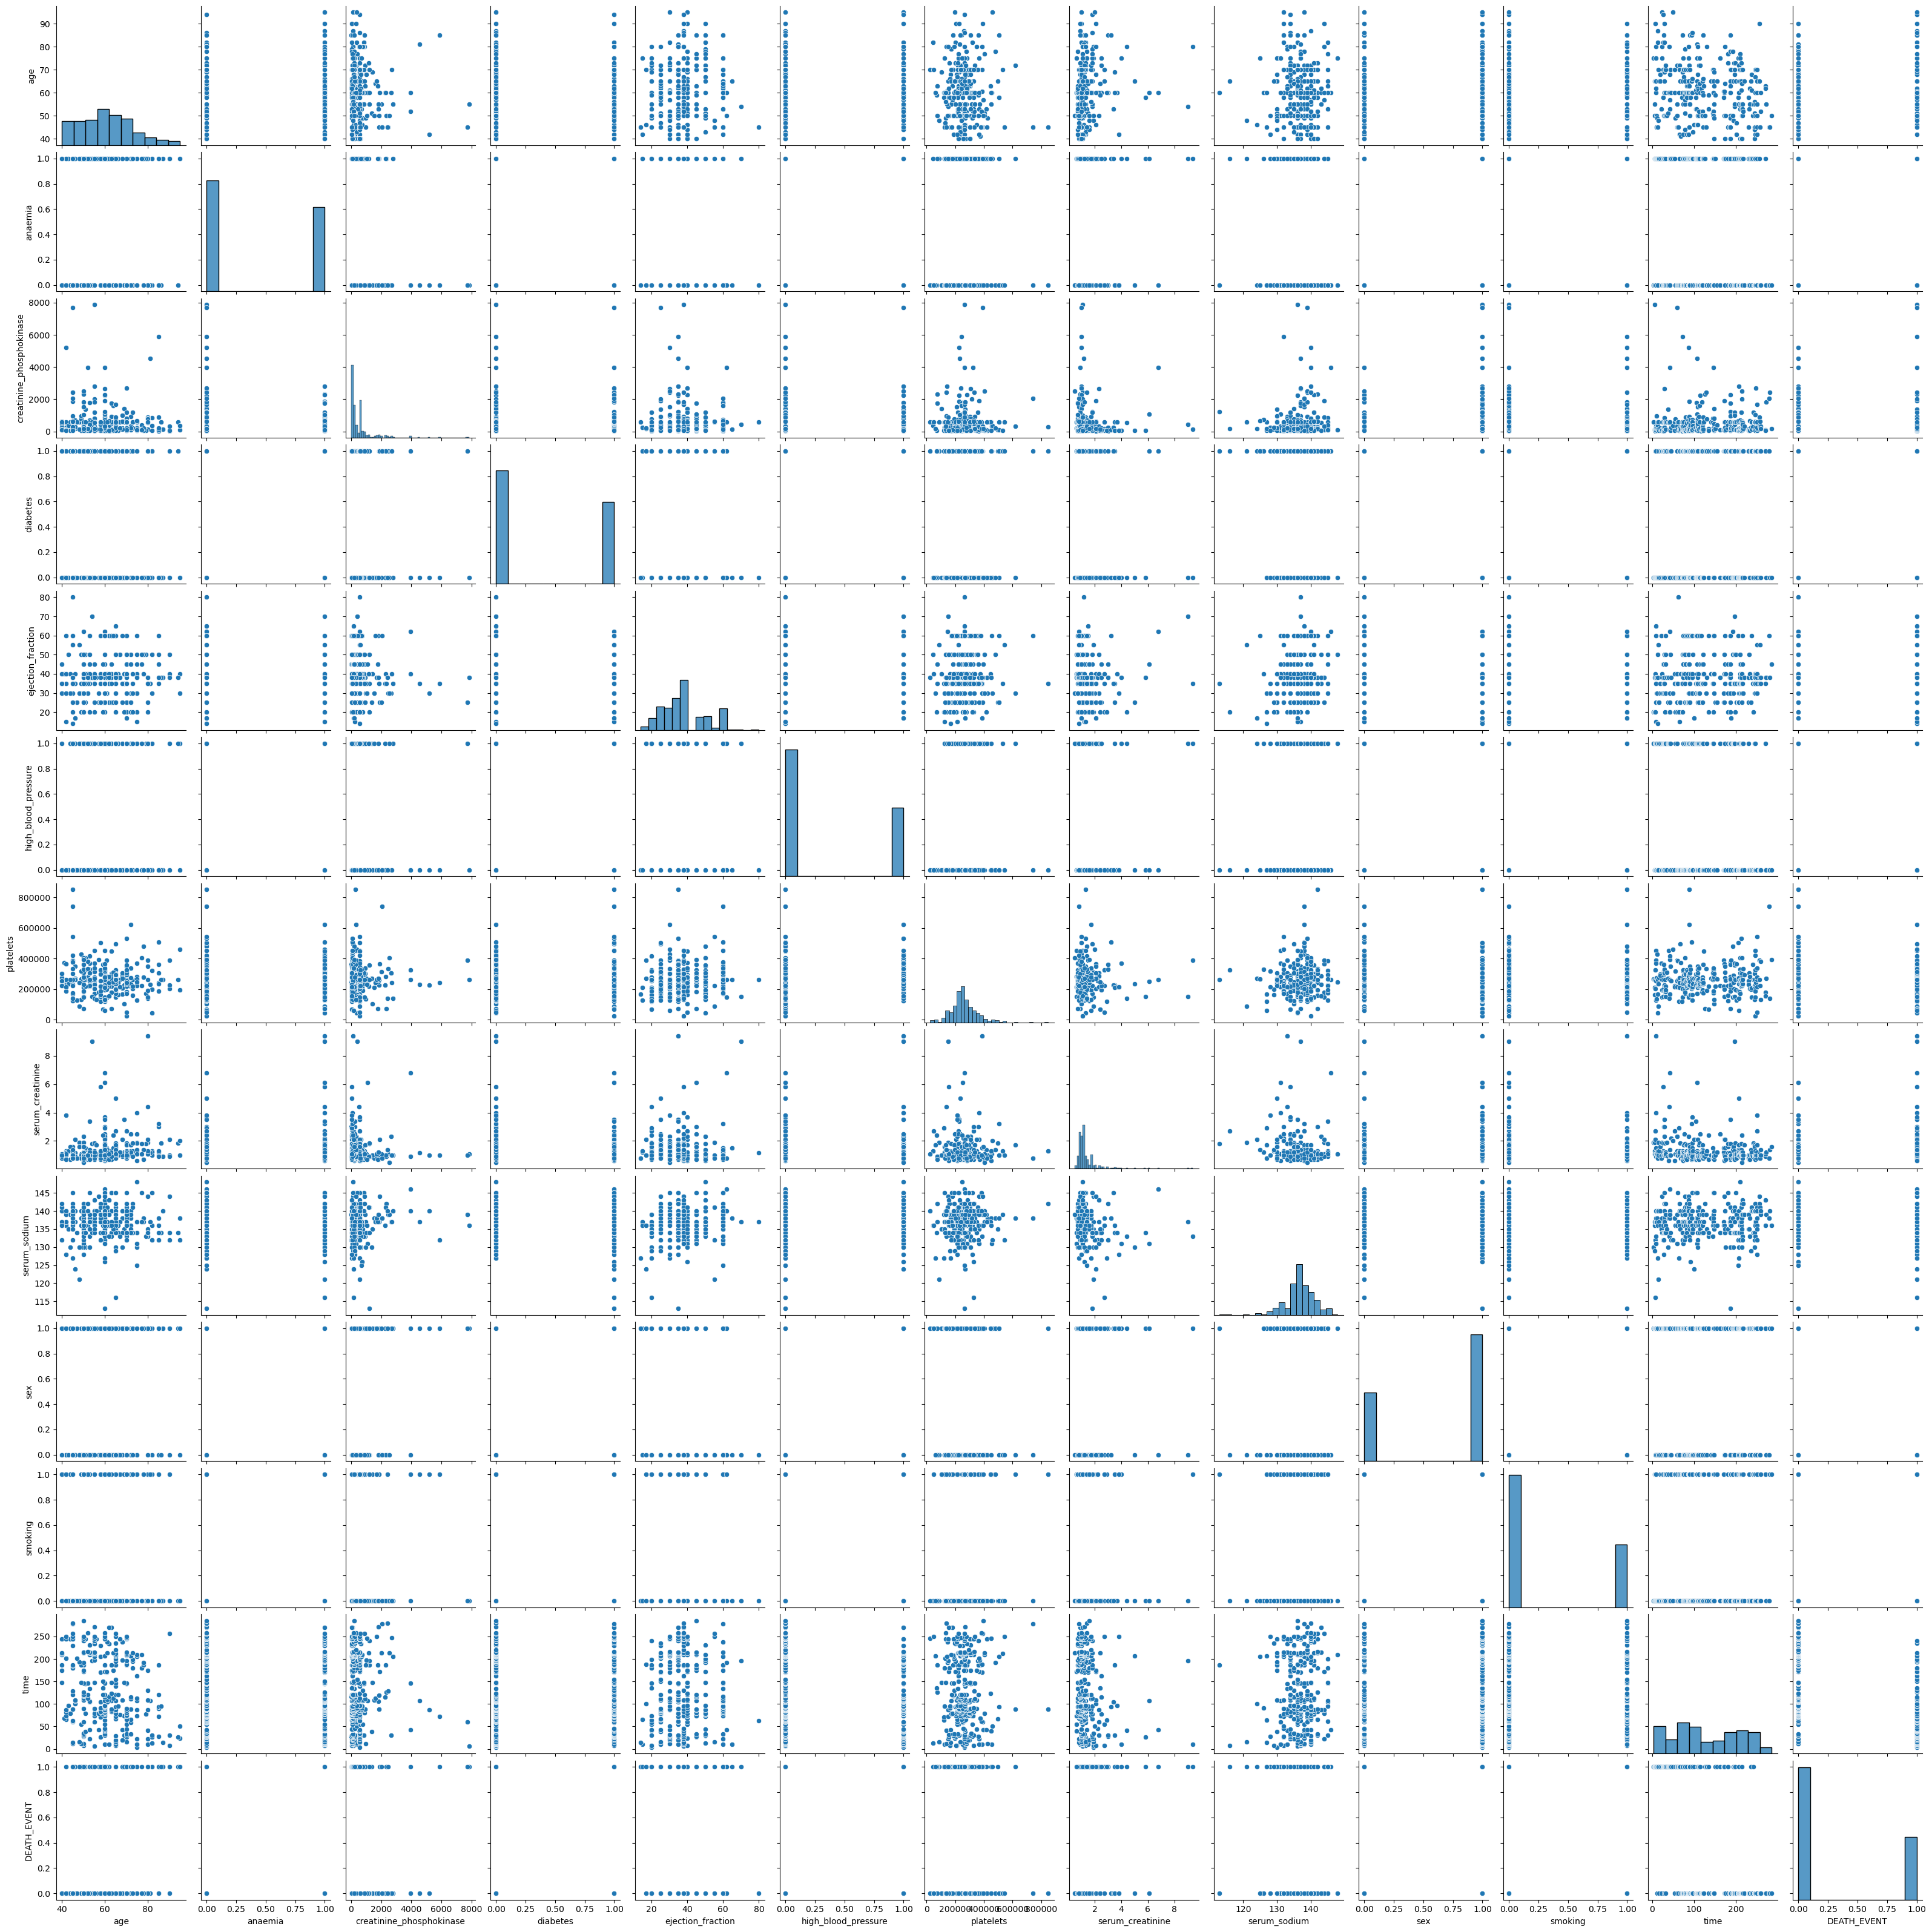

In [69]:
# Explore the distribution of numerical features
sns.pairplot(df)
plt.show()

C:\Users\DrAhm\AppData\Local\Temp\ipykernel_29468\998833217.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap( df.corr(), annot=True, cmap='cool')


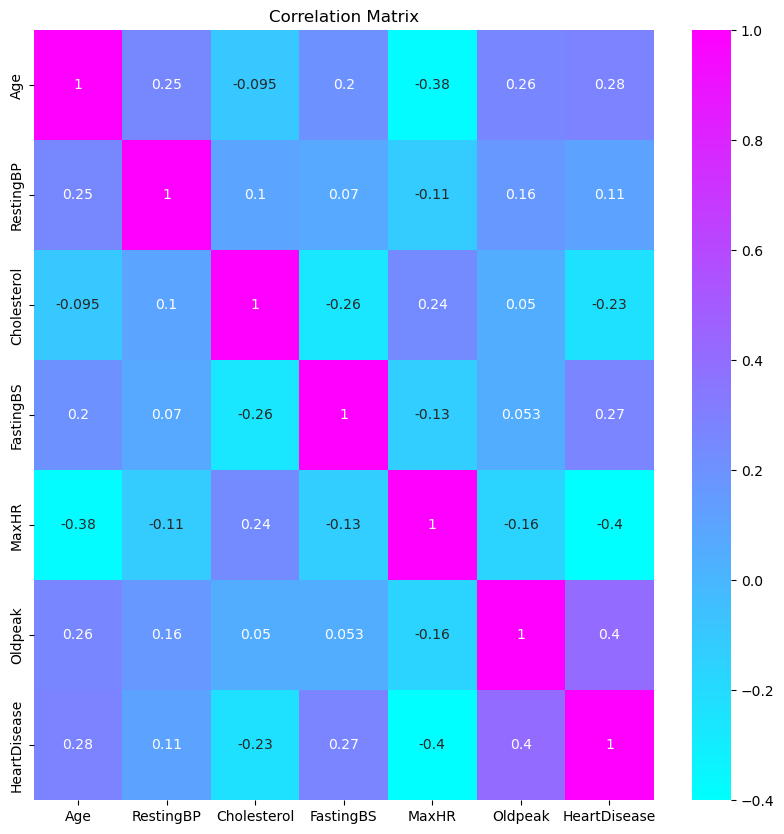

In [26]:
# Explore correlations between features
plt.figure(figsize=(10,10))
sns.heatmap( df.corr(), annot=True, cmap='cool')
plt.title('Correlation Matrix')
plt.show()

In [70]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

[0.09418112 0.02601563 0.07474547 0.0345625  0.12899072 0.0258456
 0.07084489 0.11611207 0.08945206 0.02801823 0.02764715 0.28358456]


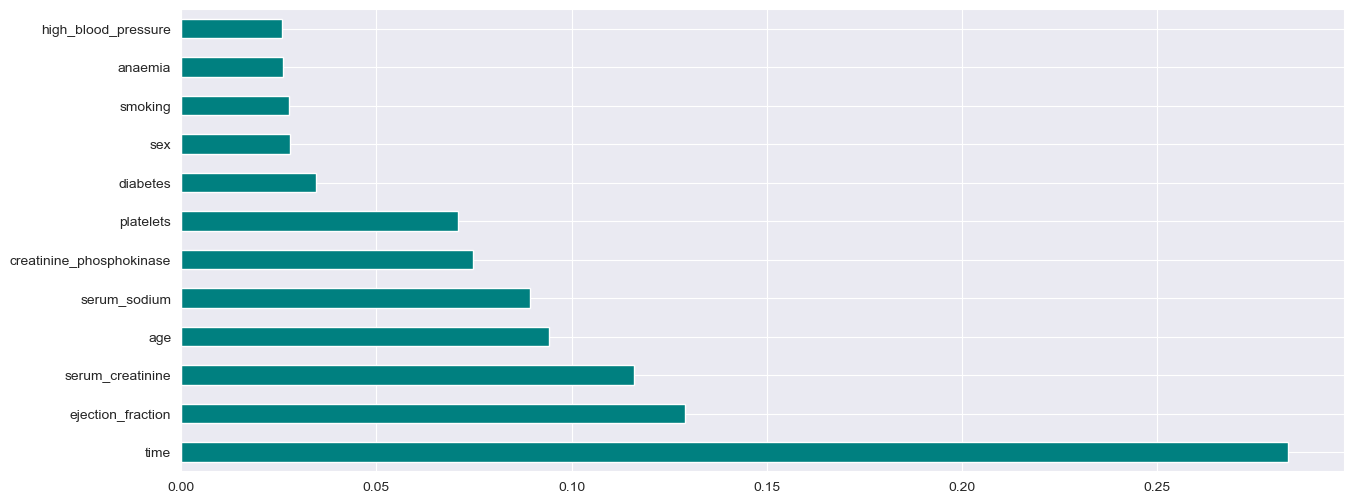

In [71]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = df.iloc[:, :-1]
y = df.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh', color='teal')
plt.show()

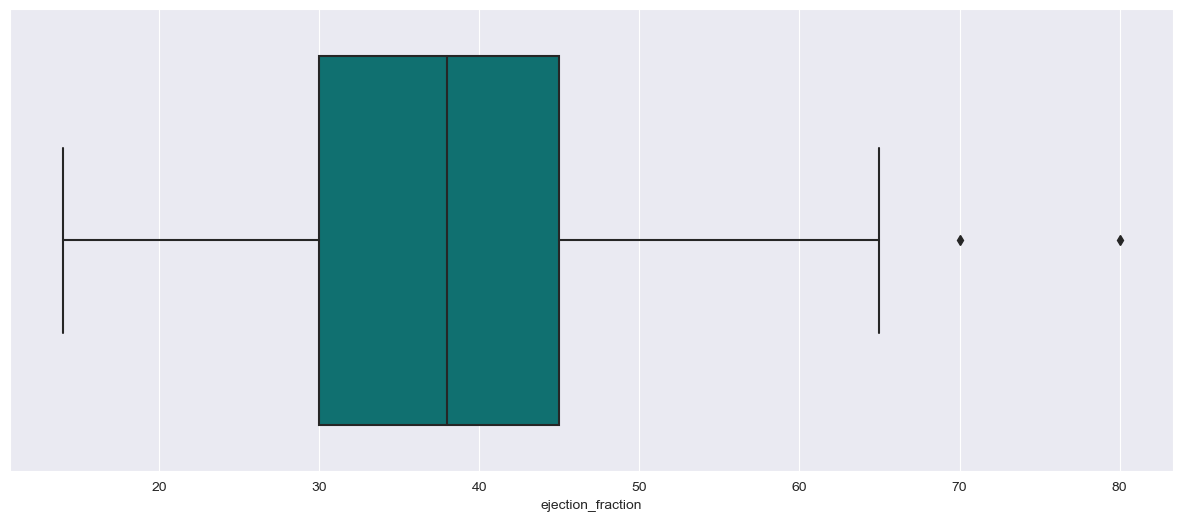

In [72]:
#check outliers
# Boxplot for ejection_fraction

sns.boxplot(x = df.ejection_fraction, color='teal')
plt.show()

In [78]:
# Removing outliers
df[df['ejection_fraction'] >= 70]

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
64   45.0        0                       582         0                 80   
217  54.0        1                       427         0                 70   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
64                     0  263358.03              1.18           137    0   
217                    1  151000.00              9.00           137    0   

     smoking  time  DEATH_EVENT  
64         0    63            0  
217        0   196            1

In [79]:
df = df[df['ejection_fraction'] < 70]

In [86]:
# Distribution of Age
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['age'],
    xbins=dict( # bins used for histogram
        start=40,
        end=95,
        size=2
    ),
    marker_color='#e8ab60',
    opacity=1
))
fig.update_layout(
    title_text='AGE DISTRIBUTION',
    xaxis_title_text='AGE',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

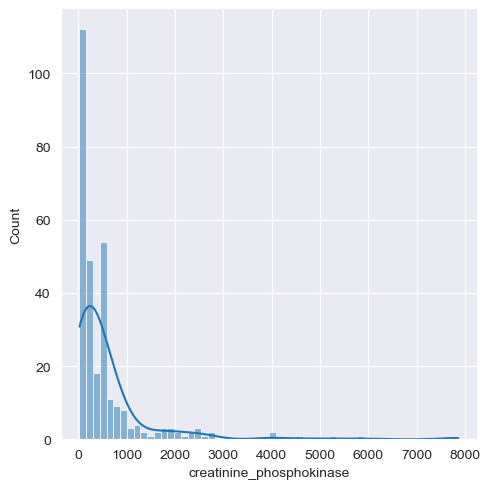

In [90]:
sns.displot(df['creatinine_phosphokinase'], kde=True)

In [91]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(df, x="creatinine_phosphokinase", color="DEATH_EVENT", marginal="violin", hover_data=df.columns,
                   title ="Distribution of CREATININE PHOSPHOKINASE Vs DEATH_EVENT", 
                   labels={"creatinine_phosphokinase": "CREATININE PHOSPHOKINASE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [92]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = df[(df["DEATH_EVENT"]==0) & (df["sex"]==1)]
d2 = df[(df["DEATH_EVENT"]==1) & (df["sex"]==1)]
d3 = df[(df["DEATH_EVENT"]==0) & (df["sex"]==0)]
d4 = df[(df["DEATH_EVENT"]==1) & (df["sex"]==0)]

label1 = ["Male","Female"]
label2 = ['Male - Survived','Male - Died', "Female -  Survived", "Female - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="GENDER"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="GENDER VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")
fig.update_layout(
    title_text="GENDER DISTRIBUTION IN THE DATASET  \
                   GENDER VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='GENDER', x=0.19, y=0.5, font_size=10, showarrow=False),
                 dict(text='GENDER VS DEATH_EVENT', x=0.84, y=0.5, font_size=9, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")

fig.show()

In [107]:
# "Distribution of AGE Vs DIABETES"
import plotly.express as px
fig = px.histogram(df, x="age", color="diabetes", marginal="violin",hover_data=df.columns,
                   title ="Distribution of AGE Vs DIABETES", 
                   labels={"diabetes": "DIABETES", "age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

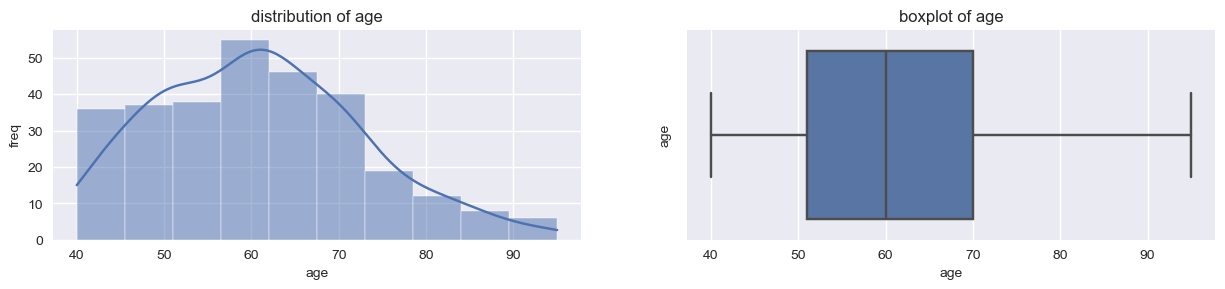

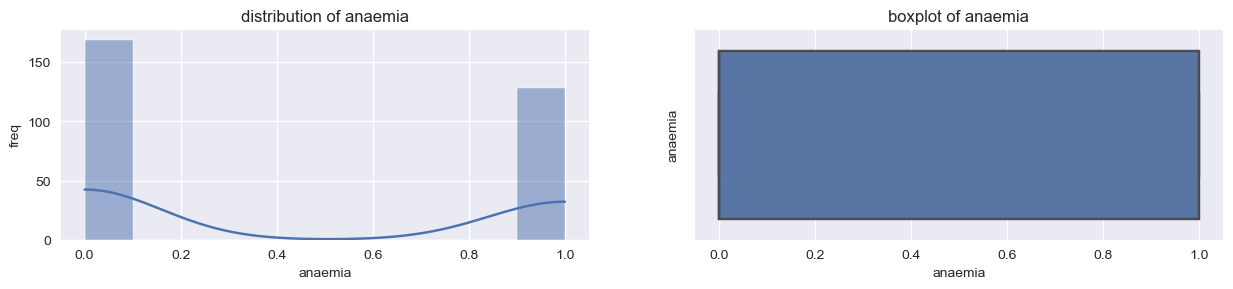

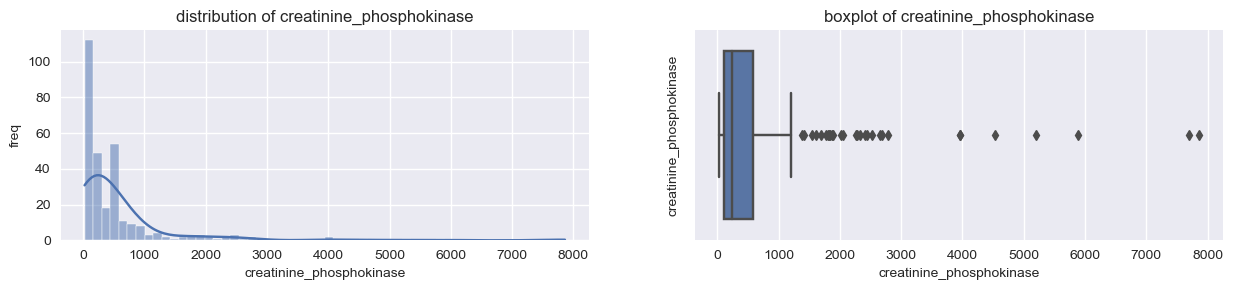

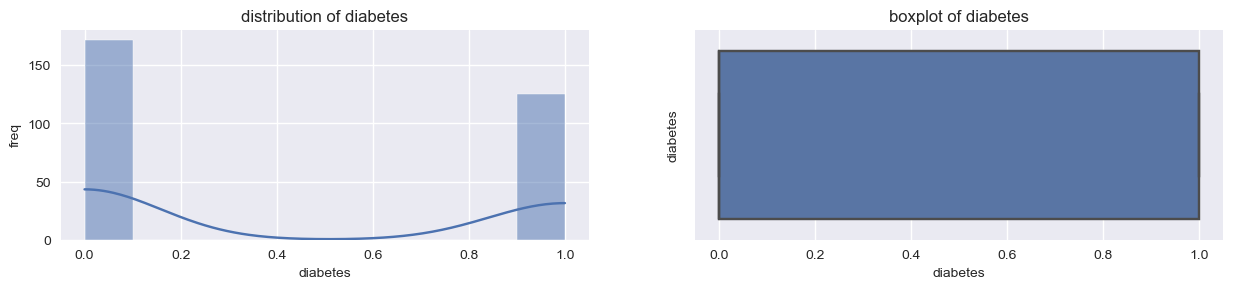

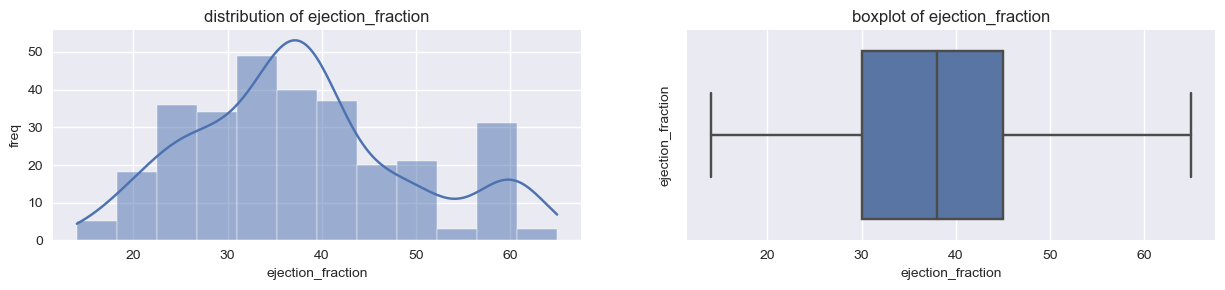

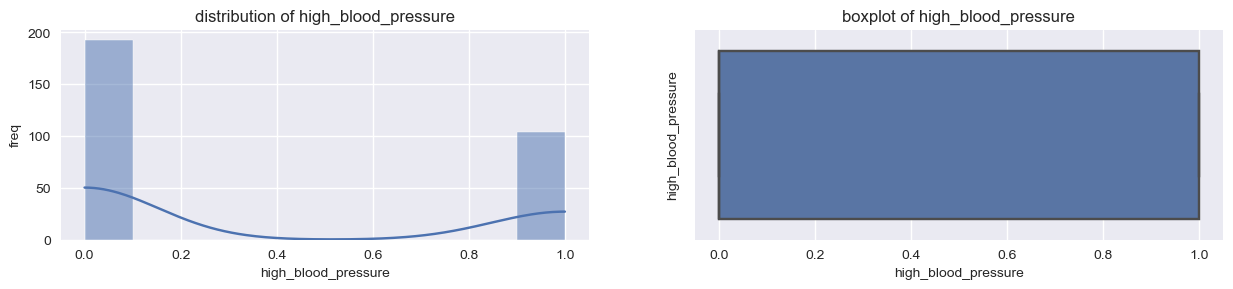

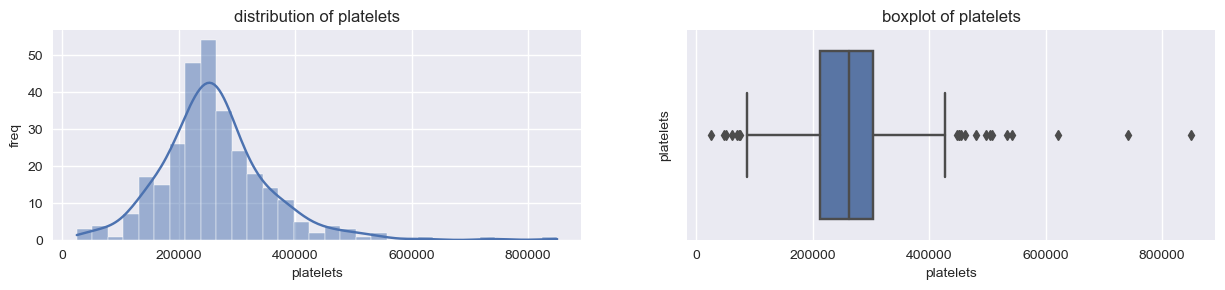

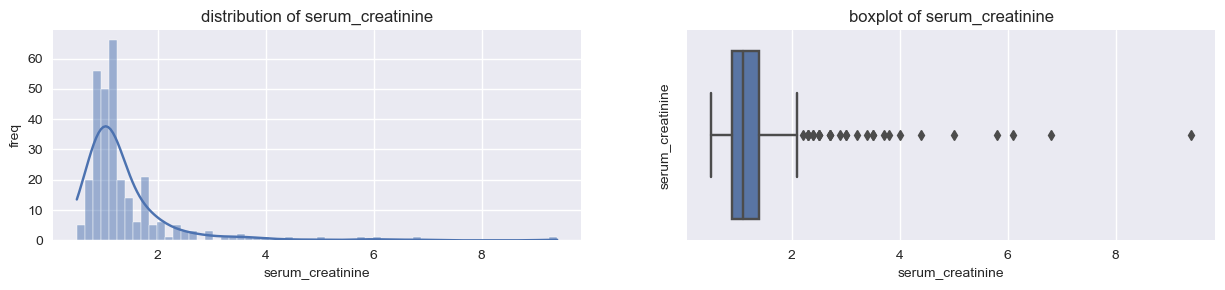

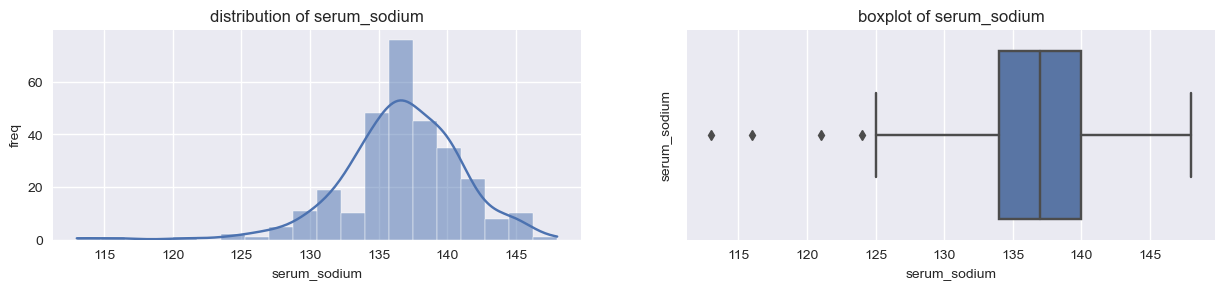

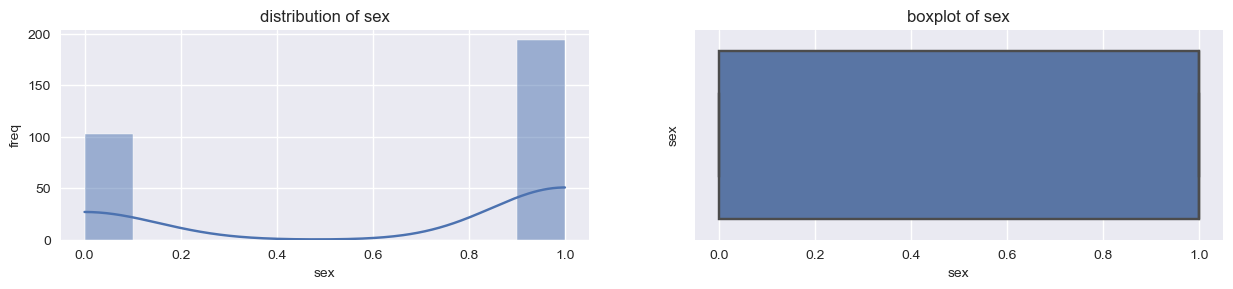

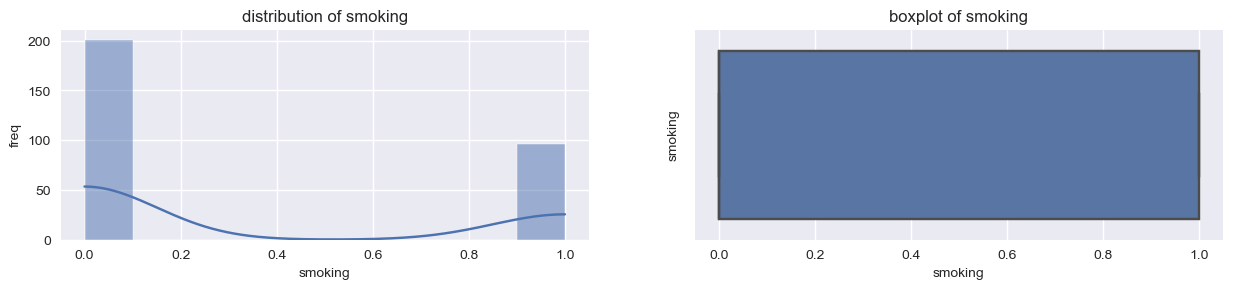

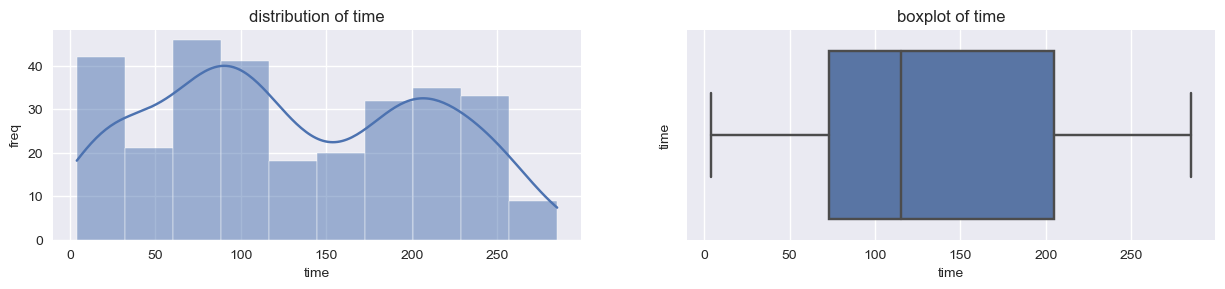

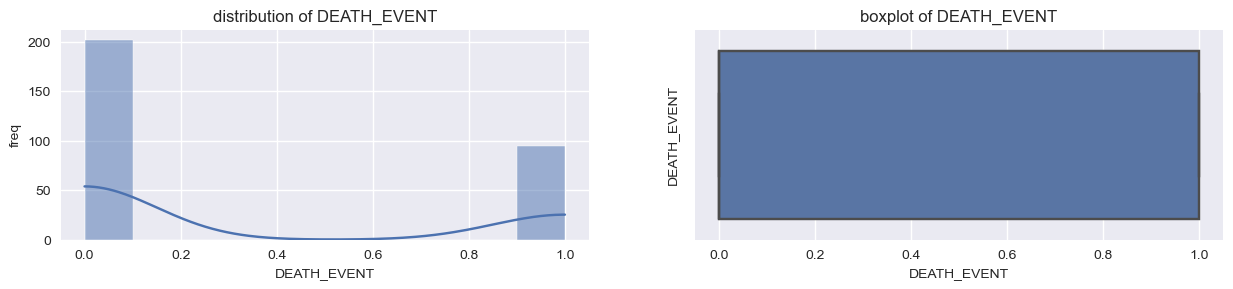

In [106]:
plt.style.use("seaborn")
for column in df.columns:
    if df[column].dtype!="object":
        plt.figure(figsize=(15,6))
        plt.subplot(2,2,1)
        sns.histplot(data=df,x=column,kde=True)
        plt.ylabel("freq")
        plt.xlabel(column)
        plt.title(f"distribution of {column}")
        plt.subplot(2,2,2)
        sns.boxplot(data=df,x=column)
        plt.ylabel(column)
        plt.title(f"boxplot of {column}")
        plt.show()

In [93]:
x = df.drop("DEATH_EVENT", axis=1)
y = df['DEATH_EVENT']

In [94]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x = scaler.fit_transform(x)
y = scaler.fit_transform(y.values.reshape(-1,1))

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 42, stratify = y)

print(f"The Shape of x_train : {x_train.shape}")
print(f"The Shape of x_test : {x_test.shape}")
print(f"The Shape of y_train : {y_train.shape}")
print(f"The Shape of y_test : {y_test.shape}")

The Shape of x_train : (237, 12)
The Shape of x_test : (60, 12)
The Shape of y_train : (237, 1)
The Shape of y_test : (60, 1)


In [96]:
classifier = DecisionTreeClassifier(max_leaf_nodes = 3, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=3, random_state=0)

In [97]:
y_predd = classifier.predict(x_test)
y_predd

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0.])

In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predd)
ac = accuracy_score(y_test, y_predd)
print(cm)
print(ac)

[[40  1]
 [ 7 12]]
0.8666666666666667


In [101]:
print(classification_report(y_test,y_predd))

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91        41
         1.0       0.92      0.63      0.75        19

    accuracy                           0.87        60
   macro avg       0.89      0.80      0.83        60
weighted avg       0.87      0.87      0.86        60



In [102]:
classifier = RandomForestClassifier(n_estimators=11, criterion='entropy', random_state=42)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [103]:
y_pred = classifier.predict(x_test)
print(y_pred)

[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0.]


In [105]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
print(ac)

[[39  2]
 [ 7 12]]
0.85
